<img src="../../images/qiskit-heading.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px\" align="left">

## Purity Randomized Benchmarking


- Last Updated: June 24, 2019
- Requires: qiskit-terra 0.8, qiskit-ignis 0.1.1, qiskit-aer 0.2

## Introduction

**Purity Randomized Benchmarking** is a variant of the Randomized Benchmarking (RB) method, which quantifies how *coherent* the errors are. The protocol executes the RB sequneces containing of Clifford gates, and then calculates the *purity* $Tr(\rho^2)$, and fits the purity result to an exponentially decaying curve.

This notebook gives an example for how to use the ``ignis.verification.randomized_benchmarking`` module in order to perform purity RB.

In [1]:
#Import general libraries (needed for functions)
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

import qiskit.ignis.verification.randomized_benchmarking as rb

#Import Qiskit classes classes
import qiskit
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error, coherent_unitary_error


## Select the Parameters of the Purity RB Run

First, wee need to choose the regular RB parameters:

- **nseeds**: The number of seeds. For each seed there you will get a separate list of output circuits.
- **length_vector**: The length vector of Clifford lengths. Must be in ascending order. RB sequences of increasing length grow on top of the previous sequences.
- **rb_pattern**: A list of the form [[i],[j],[k],...] or [[i,j],[k,l],...], etc. which will make simultaneous RB sequences. All the patterns should have the same dimetion, namely only 1-qubit sequences Qk or only 2-qubit sequences Qi,Qj, etc. The number of qubits is the sum of the entries.
- **length_multiplier = None**: No length_multiplier for purity RB.
- **seed_offset**: What to start the seeds at (e.g. if we want to add more seeds later).
- **align_cliffs**: If true adds a barrier across all qubits in rb_pattern after each set of cliffords.

As well as another parameter for purity RB:

- **is_purity = True**

In this example we have 4 qubits Q0,Q1,Q2,Q3. We are running 2Q RB (on qubits Q0,Q1 and on qubits Q2,Q3) simultaneously. 

In [2]:
# Example of 2-qubits Purity RB
#Number of qubits
nQ = 4
#Number of seeds (random sequences)
nseeds = 3
#Number of Cliffords in the sequence (start, stop, steps)
nCliffs = np.arange(1,20,2)
#2Q RB on Q0,Q2 and 1Q RB on Q1
rb_pattern = [[0,1],[2,3]]

## Generate Interleaved RB sequences

We generate purity RB sequences. We start with a small example (so it doesn't take too long to run).

In order to generate the purity RB sequences **rb_purity_circs**, which is a list of lists of lists of quantum circuits, we run the function rb.randomized_benchmarking_seq.

This function returns:

- **rb_purity_circs**: A list of lists of lists of circuits for the purity rb sequences (separate list for each of the $3^n$ options and for each seed).
- **xdata**: The Clifford lengths (with multiplier if applicable).
- **rb_opts_dict**: Option dictionary back out with default options appended.

As well as:

- **npurity**: the number of purity rb circuits (per seed) which equals to $3^n$, where $n$ is the dimension, e.g npurity=3 for 1-qubit RB, npurity=9 for 2-qubit RB.

In order to generate each of the $3^n$ circuits, we need to do (per each of the $n$ qubits) either:
- nothing (Pauli-$Z$), or
- $\pi/2$-rotation around $x$ (Pauli-$X$), or
- $\pi/2$-rotation around $y$ (Pauli-$Y$),

and then measure the result.

In [3]:
rb_opts = {}
rb_opts['length_vector'] = nCliffs
rb_opts['nseeds'] = nseeds
rb_opts['rb_pattern'] = rb_pattern
rb_opts['is_purity'] = True
rb_purity_circs, xdata, npurity = rb.randomized_benchmarking_seq(**rb_opts)
print (npurity)

9


To illustrate, we print the circuit names for purity RB.

In [4]:
for i in range(len(rb_purity_circs)):
    for j in range(len(rb_purity_circs[i])):
        for k in range(len(rb_purity_circs[i][j])):
            print (rb_purity_circs[i][j][k].name)

rb_purity_ZZ_length_0_seed_0
rb_purity_ZZ_length_1_seed_0
rb_purity_ZZ_length_2_seed_0
rb_purity_ZZ_length_3_seed_0
rb_purity_ZZ_length_4_seed_0
rb_purity_ZZ_length_5_seed_0
rb_purity_ZZ_length_6_seed_0
rb_purity_ZZ_length_7_seed_0
rb_purity_ZZ_length_8_seed_0
rb_purity_ZZ_length_9_seed_0
rb_purity_XZ_length_0_seed_0
rb_purity_XZ_length_1_seed_0
rb_purity_XZ_length_2_seed_0
rb_purity_XZ_length_3_seed_0
rb_purity_XZ_length_4_seed_0
rb_purity_XZ_length_5_seed_0
rb_purity_XZ_length_6_seed_0
rb_purity_XZ_length_7_seed_0
rb_purity_XZ_length_8_seed_0
rb_purity_XZ_length_9_seed_0
rb_purity_YZ_length_0_seed_0
rb_purity_YZ_length_1_seed_0
rb_purity_YZ_length_2_seed_0
rb_purity_YZ_length_3_seed_0
rb_purity_YZ_length_4_seed_0
rb_purity_YZ_length_5_seed_0
rb_purity_YZ_length_6_seed_0
rb_purity_YZ_length_7_seed_0
rb_purity_YZ_length_8_seed_0
rb_purity_YZ_length_9_seed_0
rb_purity_ZX_length_0_seed_0
rb_purity_ZX_length_1_seed_0
rb_purity_ZX_length_2_seed_0
rb_purity_ZX_length_3_seed_0
rb_purity_ZX_l

As an example, we print the circuit corresponding to the first RB sequences, for each of the $3^n$ parameters.

In [5]:
for i in range(npurity):
    print ("circ no. ", i)
    print (rb_purity_circs[0][i][0])

circ no.  0
         ┌───┐ ┌───┐   ░  ┌───┐┌───┐┌─┐                                      »
qr_0: |0>┤ H ├─┤ Z ├───░──┤ Z ├┤ H ├┤M├──────────────────────────────────────»
         ├───┤ ├───┤   ░  ├───┤├───┤└╥┘┌─┐                                   »
qr_1: |0>┤ H ├─┤ X ├───░──┤ X ├┤ H ├─╫─┤M├───────────────────────────────────»
         ├───┤ └───┘   ░  └───┘├───┤ ║ └╥┘┌───┐           ░ ┌───┐            »
qr_2: |0>┤ H ├──────────────■──┤ X ├─╫──╫─┤ X ├───────────░─┤ X ├────────────»
         ├───┤┌─────┐┌───┐┌─┴─┐└─┬─┘ ║  ║ ├───┤┌───┐┌───┐ ░ ├───┤┌─────┐┌───┐»
qr_3: |0>┤ H ├┤ Sdg ├┤ H ├┤ X ├──■───╫──╫─┤ H ├┤ S ├┤ Y ├─░─┤ Y ├┤ Sdg ├┤ H ├»
         └───┘└─────┘└───┘└───┘      ║  ║ └───┘└───┘└───┘ ░ └───┘└─────┘└───┘»
 cr_0: 0 ════════════════════════════╩══╬════════════════════════════════════»
                                        ║                                    »
 cr_1: 0 ═══════════════════════════════╩════════════════════════════════════»
                                        

         ┌───┐ ┌───┐   ░  ┌───┐┌───┐┌────────────┐┌─┐                     »
qr_0: |0>┤ H ├─┤ Z ├───░──┤ Z ├┤ H ├┤ Ry(1.5708) ├┤M├─────────────────────»
         ├───┤ ├───┤   ░  ├───┤├───┤├────────────┤└╥┘┌─┐                  »
qr_1: |0>┤ H ├─┤ X ├───░──┤ X ├┤ H ├┤ Rx(1.5708) ├─╫─┤M├──────────────────»
         ├───┤ └───┘   ░  └───┘├───┤└───┬───┬────┘ ║ └╥┘           ░ ┌───┐»
qr_2: |0>┤ H ├──────────────■──┤ X ├────┤ X ├──────╫──╫────────────░─┤ X ├»
         ├───┤┌─────┐┌───┐┌─┴─┐└─┬─┘    ├───┤      ║  ║ ┌───┐┌───┐ ░ ├───┤»
qr_3: |0>┤ H ├┤ Sdg ├┤ H ├┤ X ├──■──────┤ H ├──────╫──╫─┤ S ├┤ Y ├─░─┤ Y ├»
         └───┘└─────┘└───┘└───┘         └───┘      ║  ║ └───┘└───┘ ░ └───┘»
 cr_0: 0 ══════════════════════════════════════════╩══╬═══════════════════»
                                                      ║                   »
 cr_1: 0 ═════════════════════════════════════════════╩═══════════════════»
                                                                          »
 cr_2: 0 ═══

## Define a non-coherent noise model

We define a non-coherent noise model for the simulator. To simulate decay, we add depolarizing error probabilities to the CNOT and U gates.

In [6]:
noise_model = NoiseModel()
p1Q = 0.002
p2Q = 0.01
noise_model.add_all_qubit_quantum_error(depolarizing_error(p1Q, 1), 'u2')
noise_model.add_all_qubit_quantum_error(depolarizing_error(2*p1Q, 1), 'u3')
noise_model.add_all_qubit_quantum_error(depolarizing_error(p2Q, 2), 'cx')

We can execute the purity RB sequences either using Qiskit Aer Simulator (with some noise model) or using IBMQ provider, and obtain a list of results result_list.

In [7]:
#Execute purity RB circuits 
backend = qiskit.Aer.get_backend('qasm_simulator')
basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
purity_result_list = []
import time
for rb_seed in range(len(rb_purity_circs)):
    for d in range(npurity):
        print('Executing seed %d purity %d length %d'%(rb_seed, d, len(nCliffs)))
        new_circ = rb_purity_circs[rb_seed][d]
        job = qiskit.execute(new_circ, backend=backend, noise_model=noise_model, shots=shots, basis_gates=['u1','u2','u3','cx'])
        purity_result_list.append(job.result())
print("Finished Simulating Purity RB Circuits")

Executing seed 0 purity 0 length 10
Executing seed 0 purity 1 length 10
Executing seed 0 purity 2 length 10
Executing seed 0 purity 3 length 10
Executing seed 0 purity 4 length 10
Executing seed 0 purity 5 length 10
Executing seed 0 purity 6 length 10
Executing seed 0 purity 7 length 10
Executing seed 0 purity 8 length 10
Executing seed 1 purity 0 length 10
Executing seed 1 purity 1 length 10
Executing seed 1 purity 2 length 10
Executing seed 1 purity 3 length 10
Executing seed 1 purity 4 length 10
Executing seed 1 purity 5 length 10
Executing seed 1 purity 6 length 10
Executing seed 1 purity 7 length 10
Executing seed 1 purity 8 length 10
Executing seed 2 purity 0 length 10
Executing seed 2 purity 1 length 10
Executing seed 2 purity 2 length 10
Executing seed 2 purity 3 length 10
Executing seed 2 purity 4 length 10
Executing seed 2 purity 5 length 10
Executing seed 2 purity 6 length 10
Executing seed 2 purity 7 length 10
Executing seed 2 purity 8 length 10
Finished Simulating Purity R

## Fit the results

Calculate the *purity* $Tr(\rho^2)$ as the sum $\sum_k \langle P_k \rangle ^2/2^n$, and fit the purity result into an exponentially decaying function to obtain $\alpha$.

In [8]:
rbfit_purity = rb.PurityRBFitter(purity_result_list, npurity, xdata, rb_opts['rb_pattern'])

Print the fit result (seperately for each pattern)

In [9]:
rbfit_purity.add_data(purity_result_list)
print (rbfit_purity.fit)

in add_data
in calc_data
[[[0.9917166666666666, 0.9032833333333333, 0.8853888888888889, 0.8444333333333333, 0.7639277777777778, 0.7384444444444443, 0.6170944444444445, 0.5772555555555555, 0.6259611111111111, 0.5341722222222223], [0.9547500000000001, 0.9214611111111111, 0.8346611111111111, 0.7711277777777779, 0.7214777777777777, 0.713961111111111, 0.6173777777777778, 0.5960166666666666, 0.5436833333333334, 0.5757833333333332], [0.9484166666666667, 0.8939111111111109, 0.8279666666666665, 0.7284777777777777, 0.7358555555555556, 0.6555944444444445, 0.6450777777777777, 0.6248222222222222, 0.5713833333333335, 0.530411111111111]], [[0.9295499999999999, 0.8869666666666667, 0.8099277777777778, 0.7387777777777778, 0.7174777777777777, 0.6803722222222222, 0.6647222222222222, 0.6043944444444445, 0.5764, 0.5472222222222222], [0.947738888888889, 0.8762611111111112, 0.7736611111111111, 0.8109500000000001, 0.6942, 0.6944611111111108, 0.6112111111111111, 0.6170722222222222, 0.5947055555555556, 0.5431166

## Plot the results and the fit

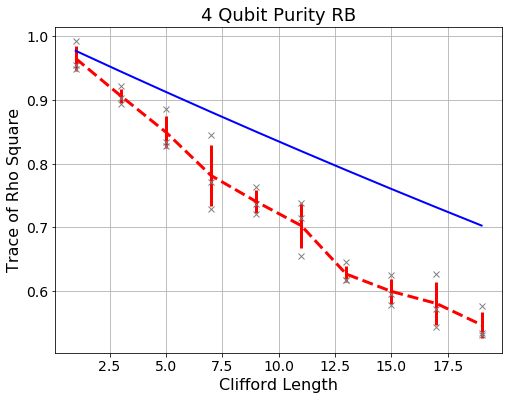

In [10]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(1, 1, 1)

# Plot the essence by calling plot_rb_data
rbfit_purity.plot_rb_data(0, ax=ax, add_label=False, show_plt=False)
    
# Add title and label
ax.set_title('%d Qubit Purity RB'%(nQ), fontsize=18)

plt.show()

For comparison, we also print the standard RB fit results

In [11]:
standard_result_list = []
count = 0
for rb_seed in range(len(rb_purity_circs)):
    for d in range(npurity):
        if d==0:
            standard_result_list.append(purity_result_list[count])
        count += 1

In [12]:
rbfit_standard = rb.RBFitter(standard_result_list, xdata, rb_opts['rb_pattern'])

In [13]:
print (rbfit_standard.fit)

[{'params': array([ 2.        ,  0.99176583, -1.00651888]), 'params_err': array([2.60924881, 0.01160024, 2.61446315]), 'epc': 0.0061756256058551895, 'epc_err': 7.223354215845482e-05}, {'params': array([0.45080554, 0.9488737 , 0.54885294]), 'params_err': array([0.0335366 , 0.00653735, 0.0363517 ]), 'epc': 0.03834472587855636, 'epc_err': 0.00026417949251372004}]


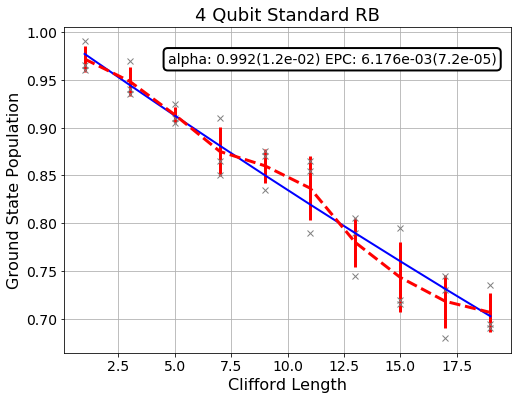

In [14]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(1, 1, 1)

# Plot the essence by calling plot_rb_data
rbfit_standard.plot_rb_data(0, ax=ax, add_label=True, show_plt=False)
    
# Add title and label
ax.set_title('%d Qubit Standard RB'%(nQ), fontsize=18)

plt.show()

## Define a coherent noise model

We define a coherent noise model for the simulator. 

In [15]:
err_unitary = np.zeros([2, 2], dtype=complex)
angle_err = 0.1
for i in range(2):
    err_unitary[i, i] = np.cos(angle_err)
    err_unitary[i, (i+1) % 2] = np.sin(angle_err)
err_unitary[0, 1] *= -1.0

error = coherent_unitary_error(err_unitary)
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(error, 'u3')

In [16]:
#Execute purity RB circuits 
backend = qiskit.Aer.get_backend('qasm_simulator')
basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
coherent_purity_result_list = []
import time
for rb_seed in range(len(rb_purity_circs)):
    for d in range(npurity):
        print('Executing seed %d purity %d length %d'%(rb_seed, d, len(nCliffs)))
        new_circ = rb_purity_circs[rb_seed][d]
        job = qiskit.execute(new_circ, backend=backend, shots=shots, noise_model=noise_model, basis_gates=['u1','u2','u3','cx'])
        coherent_purity_result_list.append(job.result())
print("Finished Simulating Purity RB Circuits")

Executing seed 0 purity 0 length 10
Executing seed 0 purity 1 length 10
Executing seed 0 purity 2 length 10
Executing seed 0 purity 3 length 10
Executing seed 0 purity 4 length 10
Executing seed 0 purity 5 length 10
Executing seed 0 purity 6 length 10
Executing seed 0 purity 7 length 10
Executing seed 0 purity 8 length 10
Executing seed 1 purity 0 length 10
Executing seed 1 purity 1 length 10
Executing seed 1 purity 2 length 10
Executing seed 1 purity 3 length 10
Executing seed 1 purity 4 length 10
Executing seed 1 purity 5 length 10
Executing seed 1 purity 6 length 10
Executing seed 1 purity 7 length 10
Executing seed 1 purity 8 length 10
Executing seed 2 purity 0 length 10
Executing seed 2 purity 1 length 10
Executing seed 2 purity 2 length 10
Executing seed 2 purity 3 length 10
Executing seed 2 purity 4 length 10
Executing seed 2 purity 5 length 10
Executing seed 2 purity 6 length 10
Executing seed 2 purity 7 length 10
Executing seed 2 purity 8 length 10
Finished Simulating Purity R

In [17]:
rbfit_purity = rb.PurityRBFitter(coherent_purity_result_list, npurity, xdata, rb_opts['rb_pattern'])

Print the fit result (seperately for each pattern)

In [18]:
rbfit_purity.add_data(coherent_purity_result_list)
print (rbfit_purity.fit)

in add_data
in calc_data
[[[1.0527444444444445, 1.1136166666666665, 1.0051777777777775, 1.0499499999999997, 1.126372222222222, 1.2049555555555553, 1.261733333333333, 1.1101944444444443, 1.100072222222222, 1.1836888888888888], [1.0613000000000001, 1.0381166666666668, 0.9507666666666668, 0.9109555555555557, 0.9252111111111112, 0.9499499999999999, 0.9813055555555557, 0.9833944444444442, 0.9190999999999999, 1.075088888888889], [1.0966888888888888, 1.0396666666666667, 1.077888888888889, 1.0206055555555555, 1.0360777777777779, 1.0207277777777777, 1.12905, 1.052638888888889, 1.0044055555555556, 1.0257444444444441]], [[1.01995, 1.0194666666666667, 1.0480333333333332, 1.1059166666666667, 1.1274777777777778, 0.9633833333333333, 1.1847277777777778, 1.0639944444444445, 1.1019999999999996, 1.1144666666666667], [1.0788555555555557, 1.0756444444444444, 1.0208666666666666, 1.0382777777777776, 1.0269722222222222, 1.1017944444444445, 0.9800888888888889, 1.0711888888888885, 1.012788888888889, 1.043233333

## Plot the results and the fit

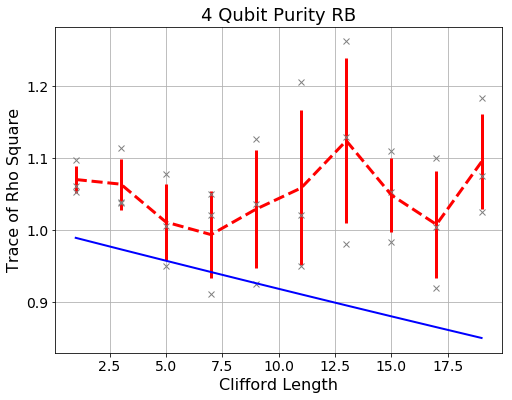

In [19]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(1, 1, 1)

# Plot the essence by calling plot_rb_data
rbfit_purity.plot_rb_data(0, ax=ax, add_label=False, show_plt=False)
    
# Add title and label
ax.set_title('%d Qubit Purity RB'%(nQ), fontsize=18)

plt.show()

For comparison, we also print the standard RB fit results

In [20]:
standard_result_list = []
count = 0
for rb_seed in range(len(rb_purity_circs)):
    for d in range(npurity):
        if d==0:
            standard_result_list.append(purity_result_list[count])
        count += 1

In [21]:
rbfit_standard = rb.RBFitter(standard_result_list, xdata, rb_opts['rb_pattern'])

In [22]:
print (rbfit_standard.fit)

[{'params': array([ 2.        ,  0.99176583, -1.00651888]), 'params_err': array([2.60924881, 0.01160024, 2.61446315]), 'epc': 0.0061756256058551895, 'epc_err': 7.223354215845482e-05}, {'params': array([0.45080554, 0.9488737 , 0.54885294]), 'params_err': array([0.0335366 , 0.00653735, 0.0363517 ]), 'epc': 0.03834472587855636, 'epc_err': 0.00026417949251372004}]


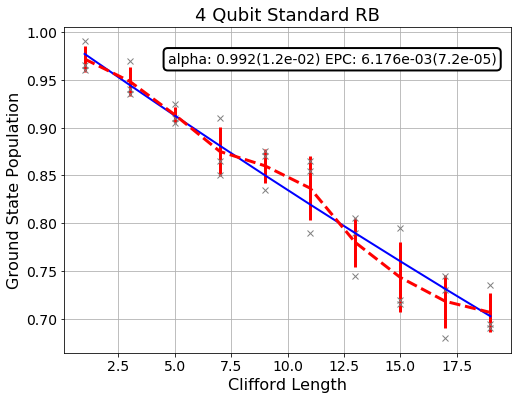

In [23]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(1, 1, 1)

# Plot the essence by calling plot_rb_data
rbfit_standard.plot_rb_data(0, ax=ax, add_label=True, show_plt=False)
    
# Add title and label
ax.set_title('%d Qubit Standard RB'%(nQ), fontsize=18)

plt.show()